In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Disclaimer : As I have mentioned 94% Accuracy on the Top of this Notebook, I must also admit that I am an absolute beginner. This much accuracy may be completely opposite to reality or maybe due to my own mismanagement during preprocessing phase. Seniors are requested to point out where I got this wrong if I did so. Thanks.**

In [6]:
sample_submission = pd.read_csv('sample_submission.csv')
test = pd.read_csv('aug_test.csv')
train = pd.read_csv("DS_Emp.csv")

In [7]:
train.shape

(19158, 14)

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
city_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [10]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


# EDA

<Axes: xlabel='gender', ylabel='training_hours'>

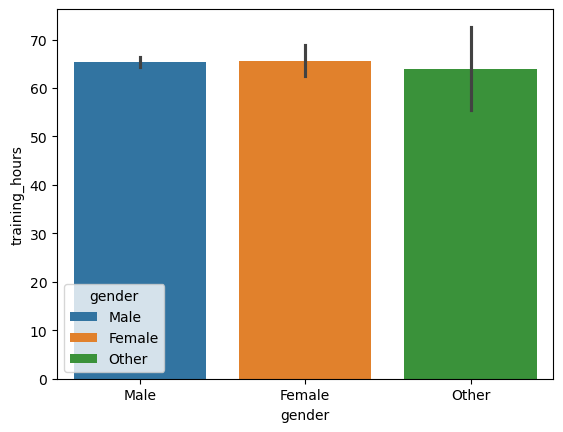

In [11]:
sns.barplot(data=train, x="gender", y="training_hours", hue="gender")
#Finding: Work hours are equal across genders.

<Axes: xlabel='gender', ylabel='target'>

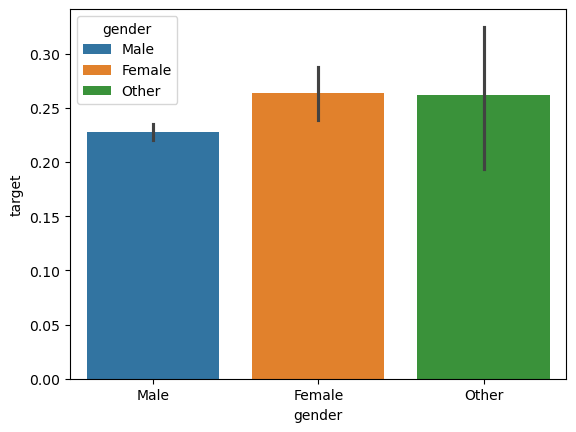

In [12]:
sns.barplot(data=train, x="gender", y="target", hue="gender")

In [13]:
train[['relevent_experience','experience','last_new_job']].sample(15)

,relevent_experience,experience,last_new_job
12841,Has relevent experience,<1,1
11607,Has relevent experience,6,1
6029,Has relevent experience,4,1
16184,No relevent experience,<1,>4
6384,No relevent experience,10,1
16485,Has relevent experience,15,1
17451,No relevent experience,6,1
11088,Has relevent experience,16,1
17381,No relevent experience,4,1
9033,Has relevent experience,13,>4


In [14]:
train.head(15)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0


<Axes: xlabel='education_level', ylabel='Count'>

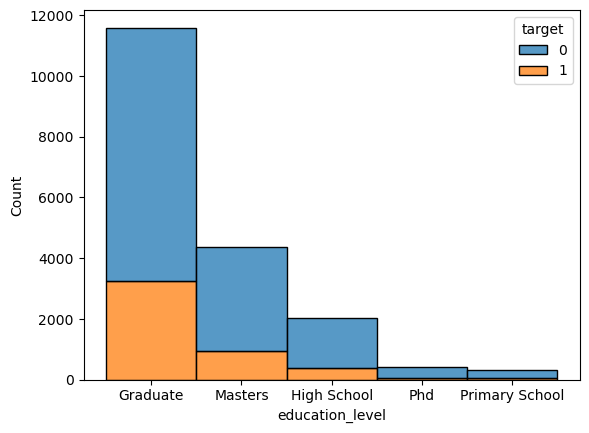

In [15]:
sns.histplot(data=train, x="education_level", hue="target", multiple="stack")

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

# Preprocessing

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
train['enrolled_university'].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64

In [21]:
import numpy as np
import pandas as pd

def norm_gender_series(s: pd.Series) -> pd.Series:
    s = s.astype('string').str.strip().str.lower()
    out = pd.Series(np.nan, index=s.index, dtype='float')
    out[s.str.startswith('f')] = 0   # female
    out[s.str.startswith('m')] = 1   # male
    out[(~s.str.startswith('f')) & (~s.str.startswith('m')) & s.notna()] = 2  # other
    return out

g_tr = norm_gender_series(train['gender'])
g_te = norm_gender_series(test['gender'])

fallback = 1  # default to 'male' if the mode is empty
mode_val = (g_tr.mode(dropna=True).iloc[0] if not g_tr.mode(dropna=True).empty else fallback)

train.loc[:, 'gender'] = g_tr.ffill().bfill().fillna(mode_val).astype('int64')
test.loc[:,  'gender'] = g_te.ffill().bfill().fillna(mode_val).astype('int64')


In [22]:
train['enrolled_university'] = train['enrolled_university'].fillna(train['enrolled_university'].value_counts().index[0])
EnrolledUniversityEncoder = LabelEncoder().fit(train['enrolled_university'])
EnrolledUniversityEncoder_List = EnrolledUniversityEncoder.classes_
train['enrolled_university'] = EnrolledUniversityEncoder.transform(train['enrolled_university'])

test['enrolled_university'] = test['enrolled_university'].fillna(test['enrolled_university'].value_counts().index[0])
EnrolledUniversityEncoder = LabelEncoder().fit(test['enrolled_university'])
EnrolledUniversityEncoder_List = EnrolledUniversityEncoder.classes_
test['enrolled_university'] = EnrolledUniversityEncoder.transform(test['enrolled_university'])

In [24]:
import numpy as np
import pandas as pd

# Define the true order (adjust if your data uses different labels)
edu_order = ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd']
edu_map   = {lvl:i for i, lvl in enumerate(edu_order)}

# Fill using TRAIN stats (no leakage)
tr_edu = train['education_level']
te_edu = test['education_level']

mode_edu = tr_edu.mode(dropna=True).iloc[0] if not tr_edu.mode(dropna=True).empty else 'Graduate'

# forward/back fill, then fallback to mode
tr_edu = tr_edu.ffill().bfill().fillna(mode_edu)
te_edu = te_edu.ffill().bfill().fillna(mode_edu)

# map to ordered ints; unknown labels -> mode’s code
fallback_code = edu_map.get(mode_edu, edu_map['Graduate'])
train.loc[:, 'education_level'] = tr_edu.map(edu_map).fillna(fallback_code).astype('int64')
test.loc[:,  'education_level'] = te_edu.map(edu_map).fillna(fallback_code).astype('int64')


In [27]:
from sklearn.preprocessing import LabelEncoder  # <- import on its own line

# ...then your code...
mode_md = train['major_discipline'].mode(dropna=True).iloc[0]
train.loc[:, 'major_discipline'] = train['major_discipline'].ffill().bfill().fillna(mode_md)
test.loc[:,  'major_discipline'] = test['major_discipline'].ffill().bfill().fillna(mode_md)

_md_le = LabelEncoder().fit(train['major_discipline'])

major_disciplineEncoder_List = _md_le.classes_  # <- if you need the class list

train.loc[:, 'major_discipline'] = _md_le.transform(train['major_discipline']).astype('int64')

known = set(_md_le.classes_)
test_safe = test['major_discipline'].where(test['major_discipline'].isin(known), '__unknown__')
_md_le.classes_ = np.append(_md_le.classes_, '__unknown__')
test.loc[:, 'major_discipline'] = _md_le.transform(test_safe).astype('int64')


In [29]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 1) Fill NA safely (no chained assignment; no deprecated 'method')
mode_md = train['major_discipline'].mode(dropna=True).iloc[0]
train.loc[:, 'major_discipline'] = train['major_discipline'].ffill().bfill().fillna(mode_md)
test.loc[:,  'major_discipline'] = test['major_discipline'].ffill().bfill().fillna(mode_md)

# 2) Fit encoder on TRAIN only
_md_le = LabelEncoder().fit(train['major_discipline'])

# 3) Transform train
train.loc[:, 'major_discipline'] = _md_le.transform(train['major_discipline']).astype('int64')

# 4) Handle unseen categories in TEST via an '__unknown__' bucket
known = set(_md_le.classes_)
test_safe = test['major_discipline'].where(test['major_discipline'].isin(known), '__unknown__')
_md_le.classes_ = np.append(_md_le.classes_, '__unknown__')

test.loc[:, 'major_discipline'] = _md_le.transform(test_safe).astype('int64')


In [31]:
import numpy as np, pandas as pd, re

def parse_experience(x):
    """<1 -> 0, 1..20 -> 1..20, >20 -> 21; anything odd -> NaN."""
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    if s in {"<1","< 1"}: return 0
    if s in {">20","> 20"}: return 21
    if s in {"0","0.0"}: return 0
    if s.isdigit():
        v = int(s); return 21 if v>20 else max(0,v)
    m = re.search(r"\d+", s)
    if m:
        v = int(m.group()); return 21 if v>20 else max(0,v)
    return np.nan

# TRAIN → parse → impute with TRAIN median → int
tr_exp = train['experience'].map(parse_experience).astype('float')
exp_med = np.nanmedian(tr_exp) if np.isfinite(tr_exp).any() else 0
train.loc[:, 'experience'] = np.where(np.isnan(tr_exp), exp_med, tr_exp).astype('int64')

# TEST → parse → impute using the SAME TRAIN median (no leakage)
te_exp = test['experience'].map(parse_experience).astype('float')
test.loc[:, 'experience'] = np.where(np.isnan(te_exp), exp_med, te_exp).astype('int64')


In [33]:
import pandas as pd
import numpy as np

# Raw -> bucket
bucket_map = {
    '<10':'Startup','10/49':'Small','50-99':'Small',
    '100-500':'Medium','500-999':'Medium',
    '1000-4999':'Large','5000-9999':'Large','10000+':'Large'
}
# Ordered buckets -> ints
ord_map = {'Startup':0, 'Small':1, 'Medium':2, 'Large':3}
valid = set(ord_map.keys())

# --- TRAIN ---
tr_raw = train['company_size'].astype('string')                  # avoid downcasting warning
tr_b  = tr_raw.replace(bucket_map)                               # bucket ranges
# choose safe mode among valid labels; fallback to 'Small'
tr_mode = tr_b[tr_b.isin(valid)].mode()
tr_mode = tr_mode.iloc[0] if len(tr_mode) else 'Small'
# force unexpected/NaN to mode
tr_b = tr_b.where(tr_b.isin(valid), tr_mode).fillna(tr_mode)
# map to ints
train.loc[:, 'company_size'] = tr_b.map(ord_map).astype('int64')

# --- TEST (use TRAIN mode to avoid leakage) ---
te_raw = test['company_size'].astype('string')
te_b  = te_raw.replace(bucket_map)
te_b  = te_b.where(te_b.isin(valid), tr_mode).fillna(tr_mode)
test.loc[:, 'company_size'] = te_b.map(ord_map).astype('int64')


In [34]:
test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,2,Has relevent experience,0,2,5,19,1,NaN,1,21
1,9858,city_103,0.920,2,Has relevent experience,2,2,5,15,1,Pvt Ltd,1,98
2,31806,city_21,0.624,2,No relevent experience,2,2,5,20,1,Pvt Ltd,never,15
3,27385,city_13,0.827,2,Has relevent experience,2,2,5,2,1,Pvt Ltd,1,39
4,27724,city_103,0.920,2,Has relevent experience,2,2,5,21,1,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,2,No relevent experience,2,2,2,7,1,Public Sector,4,15
2125,195,city_136,0.897,2,Has relevent experience,2,2,5,9,1,NaN,2,30
2126,31762,city_100,0.887,2,No relevent experience,2,2,5,13,1,Pvt Ltd,never,18
2127,7873,city_102,0.804,2,Has relevent experience,0,2,5,17,1,Public Sector,1,84


In [35]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,2,Has relevent experience,2,2,5,21,1,NaN,1,36,1
1,29725,city_40,0.776,2,No relevent experience,2,2,5,6,1,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,2,No relevent experience,0,2,5,15,1,NaN,never,83,0
3,33241,city_115,0.789,2,No relevent experience,2,2,1,20,1,Pvt Ltd,never,52,1
4,666,city_162,0.767,2,Has relevent experience,2,2,5,21,1,Funded Startup,4,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,2,No relevent experience,2,2,2,5,1,NaN,1,42,1
19154,31398,city_103,0.920,2,Has relevent experience,2,2,5,5,1,NaN,4,52,1
19155,24576,city_103,0.920,2,Has relevent experience,2,2,5,21,1,Pvt Ltd,4,44,0
19156,5756,city_65,0.802,2,Has relevent experience,2,2,5,20,1,Pvt Ltd,2,97,0


In [37]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# 1) Fill NAs safely (no chained assignment, no deprecated 'method')
mode_ct = train['company_type'].mode(dropna=True).iloc[0]
train.loc[:, 'company_type'] = train['company_type'].ffill().bfill().fillna(mode_ct)
test.loc[:,  'company_type'] = test['company_type'].ffill().bfill().fillna(mode_ct)

# 2) Fit encoder on TRAIN only
_ct_le = LabelEncoder().fit(train['company_type'])

# 3) Transform train
train.loc[:, 'company_type'] = _ct_le.transform(train['company_type']).astype('int64')

# 4) Handle unseen categories in TEST via an '__unknown__' bucket
known = set(_ct_le.classes_)
test_safe = test['company_type'].where(test['company_type'].isin(known), '__unknown__')
_ct_le.classes_ = np.append(_ct_le.classes_, '__unknown__')

test.loc[:, 'company_type'] = _ct_le.transform(test_safe).astype('int64')


In [39]:
import numpy as np, pandas as pd, re

def parse_last_new_job(x):
    """
    Map to ordered ints:
      never -> 0
      1,2,3 -> 1..3
      4+, >=4, >4 -> 4
    Unknown -> NaN (we'll impute)
    """
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    if s in {"never", "no", "no change", "no-change", "none"}: return 0
    if s in {"4+", ">4", ">=4", "4 plus", "4 or more"}: return 4
    if s.isdigit():
        v = int(s)
        return 4 if v >= 4 else v
    m = re.search(r"\d+", s)
    if m:
        v = int(m.group())
        return 4 if v >= 4 else max(0, v)
    return np.nan

# TRAIN: parse → impute with TRAIN median → cast int
tr_lnj = train['last_new_job'].map(parse_last_new_job).astype('float')
lnj_med = np.nanmedian(tr_lnj) if np.isfinite(tr_lnj).any() else 1.0
train.loc[:, 'last_new_job'] = np.where(np.isnan(tr_lnj), lnj_med, tr_lnj).astype('int64')

# TEST: parse → impute using the SAME TRAIN median (no leakage) → cast int
te_lnj = test['last_new_job'].map(parse_last_new_job).astype('float')
test.loc[:, 'last_new_job'] = np.where(np.isnan(te_lnj), lnj_med, te_lnj).astype('int64')


In [42]:
import numpy as np

# 1) Fill NAs using TRAIN mode (no leakage)
mode_city = train['city'].mode(dropna=True).iloc[0]
tr_city = train['city'].ffill().bfill().fillna(mode_city)
te_city = test['city'].ffill().bfill().fillna(mode_city)

# 2) Frequency map from TRAIN only (optionally log-compress)
freq = tr_city.value_counts(normalize=True)
freq = np.log1p(freq)  # remove this line if you want raw proportions

min_freq = float(freq.min()) if len(freq) else 0.0

# 3) Write floats (avoid dtype warning)
train['city'] = tr_city.map(freq).fillna(min_freq).astype('float32')
test['city']  = te_city.map(freq).fillna(min_freq).astype('float32')



In [44]:
import numpy as np
import pandas as pd

# robust normalizer: passes through existing 0/1, handles text
def _norm_re(x):
    if pd.notna(x) and isinstance(x, (int, np.integer, float)) and x in (0, 1):
        return int(x)
    if pd.isna(x):
        return np.nan
    s = str(x).strip().lower()
    if "has" in s: return 1
    if "no"  in s: return 0
    return np.nan

def _safe_mode(s: pd.Series, fallback=0):
    m = s.mode(dropna=True)
    return m.iloc[0] if len(m) else fallback

# map -> fill using TRAIN stats (no leakage) -> cast
tr = train['relevent_experience'].map(_norm_re)
te = test['relevent_experience'].map(_norm_re)

mode_val = _safe_mode(tr, fallback=0)  # default to 0 (“no”) if empty
train.loc[:, 'relevent_experience'] = tr.ffill().bfill().fillna(mode_val).astype('int8')
test.loc[:,  'relevent_experience']  = te.ffill().bfill().fillna(mode_val).astype('int8')


In [45]:
test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,0.002450,0.827,2,0,0,2,5,19,1,6,0,21
1,9858,0.204833,0.920,2,0,2,2,5,15,1,5,0,98
2,31806,0.007851,0.624,2,1,2,2,5,20,1,5,4,15
3,27385,0.002919,0.827,2,0,2,2,5,2,1,5,0,39
4,27724,0.204833,0.920,2,0,2,2,5,21,1,5,4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,0.204833,0.920,2,1,2,2,2,7,1,4,3,15
2125,195,0.000470,0.897,2,0,2,2,5,9,1,4,1,30
2126,31762,0.014252,0.887,2,1,2,2,5,13,1,5,4,18
2127,7873,0.015743,0.804,2,0,0,2,5,17,1,4,0,84


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  float32
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  int64  
 4   relevent_experience     19158 non-null  int64  
 5   enrolled_university     19158 non-null  int64  
 6   education_level         19158 non-null  int64  
 7   major_discipline        19158 non-null  int64  
 8   experience              19158 non-null  int64  
 9   company_size            19158 non-null  int64  
 10  company_type            19158 non-null  int64  
 11  last_new_job            19158 non-null  int64  
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  int64  
dtypes: float32(1), float64(1), int64(12)
m

In [47]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(train)
# prof.to_file(output_file='AfterImputations.html')

In [48]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0.204833,0.920,2,0,2,2,5,21,1,6,0,36,1
1,29725,0.003543,0.776,2,1,2,2,5,6,1,5,4,47,0
2,11561,0.131938,0.624,2,1,0,2,5,15,1,5,4,83,0
3,33241,0.002815,0.789,2,1,2,2,1,20,1,5,4,52,1
4,666,0.019846,0.767,2,0,2,2,5,21,1,1,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.007851,0.878,2,1,2,2,2,5,1,1,0,42,1
19154,31398,0.204833,0.920,2,0,2,2,5,5,1,1,3,52,1
19155,24576,0.204833,0.920,2,0,2,2,5,21,1,5,3,44,0
19156,5756,0.009093,0.802,2,0,2,2,5,20,1,5,1,97,0


In [49]:
#PairPlot for Analysis
# sns.pairplot(data=train)

In [50]:
train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,0.204833,0.920,2,0,2,2,5,21,1,6,0,36,1
1,29725,0.003543,0.776,2,1,2,2,5,6,1,5,4,47,0
2,11561,0.131938,0.624,2,1,0,2,5,15,1,5,4,83,0
3,33241,0.002815,0.789,2,1,2,2,1,20,1,5,4,52,1
4,666,0.019846,0.767,2,0,2,2,5,21,1,1,3,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.007851,0.878,2,1,2,2,2,5,1,1,0,42,1
19154,31398,0.204833,0.920,2,0,2,2,5,5,1,1,3,52,1
19155,24576,0.204833,0.920,2,0,2,2,5,21,1,5,3,44,0
19156,5756,0.009093,0.802,2,0,2,2,5,20,1,5,1,97,0


In [51]:
company_typeEncoder_List = company_typeEncoder_List.astype(str)  # Otherwise "`value` must be an instance of str or bytes, not a float" Error Comes While histogram plot.
company_typeEncoder_List

array(['Early Stage Startup', 'Funded Startup', 'NGO', 'Other',
       'Public Sector', 'Pvt Ltd', 'nan'], dtype='<U19')

In [52]:
company_sizeEncoder_List = company_sizeEncoder_List.astype(str)  # Otherwise "`value` must be an instance of str or bytes, not a float" Error Comes While histogram plot.
company_sizeEncoder_List

array(['Large', 'Medium', 'Small', 'Startup'], dtype='<U7')

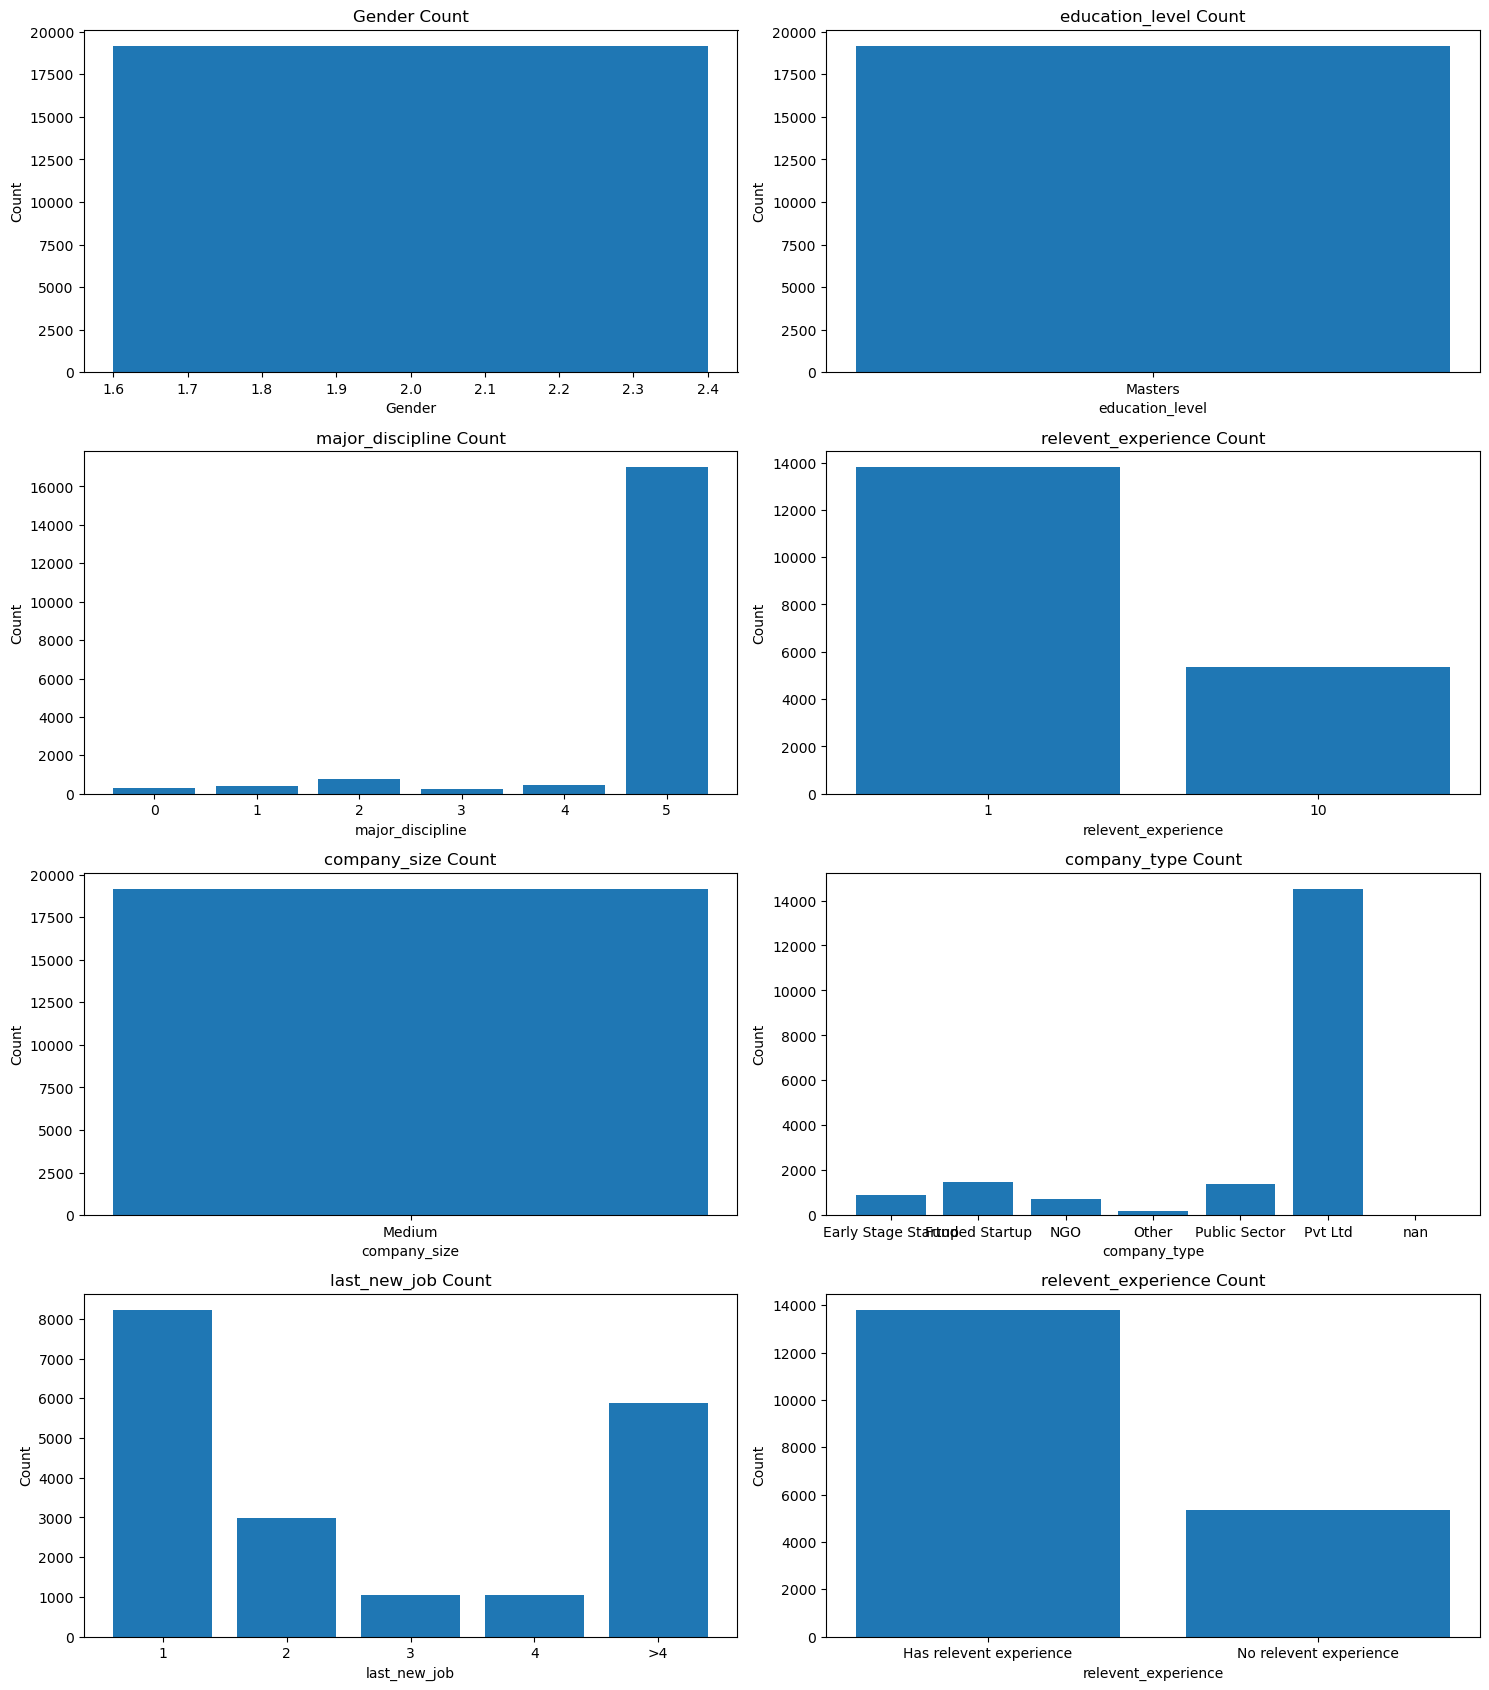

In [53]:
#Histogram of the labels in each column to check if oversampling is necessary
plt.figure(figsize=(15,25))
plt.subplot(6,2,1)
itemList,count = np.unique(train['gender'],return_counts=True)
plt.title("Gender Count")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.bar([gender_List[i] for i in itemList],count)

plt.subplot(6,2,2)
itemList,count = np.unique(train['education_level'],return_counts=True)
plt.title("education_level Count")
plt.xlabel("education_level")
plt.ylabel("Count")
plt.bar([EducationLevelEncoder_List[i] for i in itemList],count)

plt.subplot(6,2,3)
itemList,count = np.unique(train['major_discipline'],return_counts=True)
plt.title("major_discipline Count")
plt.xlabel("major_discipline")
plt.ylabel("Count")
plt.bar([major_disciplineEncoder_List[i] for i in itemList],count)

plt.subplot(6,2,4)
itemList,count = np.unique(train['relevent_experience'],return_counts=True)
plt.title("relevent_experience Count")
plt.xlabel("relevent_experience")
plt.ylabel("Count")
plt.bar([experienceEncoder_List[i] for i in itemList],count)

plt.subplot(6,2,5)
itemList,count = np.unique(train['company_size'],return_counts=True)
plt.title("company_size Count")
plt.xlabel("company_size")
plt.ylabel("Count")
plt.bar([company_sizeEncoder_List[i] for i in itemList],count)

plt.subplot(6,2,6)
itemList,count = np.unique(train['company_type'],return_counts=True)
plt.title("company_type Count")
plt.xlabel("company_type")
plt.ylabel("Count")
plt.bar([company_typeEncoder_List[i] for i in itemList],count)

plt.subplot(6,2,7)
itemList,count = np.unique(train['last_new_job'],return_counts=True)
plt.title("last_new_job Count")
plt.xlabel("last_new_job")
plt.ylabel("Count")
plt.bar([last_new_jobEncoder_List[i] for i in itemList],count)

plt.subplot(6,2,8)
itemList,count = np.unique(train['relevent_experience'],return_counts=True)
plt.title("relevent_experience Count")
plt.xlabel("relevent_experience")
plt.ylabel("Count")
plt.bar([relevent_experience_List[i] for i in itemList],count)

plt.tight_layout()
plt.show()

In [54]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
enrollee_id,19158.0,16875.358179,9616.292592,1.000000,8554.25000,16982.500000,25169.750000,33380.000000
city,19158.0,0.083128,0.077745,0.000104,0.01281,0.067412,0.131938,0.204833
city_development_index,19158.0,0.828848,0.123362,0.448000,0.74000,0.903000,0.920000,0.949000
gender,19158.0,2.000000,0.000000,2.000000,2.00000,2.000000,2.000000,2.000000
relevent_experience,19158.0,0.280092,0.449056,0.000000,0.00000,0.000000,1.000000,1.000000
enrolled_university,19158.0,1.545255,0.800123,0.000000,1.00000,2.000000,2.000000,2.000000
education_level,19158.0,2.000000,0.000000,2.000000,2.00000,2.000000,2.000000,2.000000
major_discipline,19158.0,4.670425,1.019747,0.000000,5.00000,5.000000,5.000000,5.000000
experience,19158.0,12.912778,6.600816,0.000000,7.00000,14.000000,19.000000,21.000000
company_size,19158.0,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000


# Model Training and Splitting

In [86]:
#Now Lets Reduce Imbalance in the dataset
# from imblearn.over_sampling import SMOTE
# X_tr = train[train.columns[:len(train.columns)-1]].to_numpy()
# y_te = train[train.columns[len(train.columns)-1]].to_numpy()
# over = SMOTE(random_state=42)
# X_train, y_train = over.fit_resample(X_tr,X_te)

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np

# --- choose features/target ---
drop_cols = ["enrollee_id"]        # drop IDs if present
target    = "target"

X_full = train.drop(columns=drop_cols + [target])
y_full = train[target]

# --- 80/20 split (stratified) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.20, random_state=42, stratify=y_full
)

# --- SMOTE only on the training split ---
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Optional: convert to numpy if your code expects arrays
X_train_np = X_train_sm.to_numpy() if hasattr(X_train_sm, "to_numpy") else np.asarray(X_train_sm)
X_val_np   = X_test.to_numpy()      if hasattr(X_test, "to_numpy")      else np.asarray(X_test)
y_train_np = y_train_sm.to_numpy() if hasattr(y_train_sm, "to_numpy") else np.asarray(y_train_sm)
y_val_np   = y_test.to_numpy()      if hasattr(y_test, "to_numpy")      else np.asarray(y_test)

print("Shapes ->",
      "X_train:", X_train_np.shape,
      "y_train:", y_train_np.shape,
      "| X_test:", X_val_np.shape,
      "y_test:", y_val_np.shape)


Shapes -> X_train: (23008, 12) y_train: (23008,) | X_test: (3832, 12) y_test: (3832,)


In [87]:
X_train.shape

(15326, 12)

In [88]:
y_test

686      0
1106     1
8966     0
7961     1
5182     1
        ..
9055     1
11207    0
16790    0
5575     0
10387    0
Name: target, Length: 3832, dtype: int64

In [79]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV

# # --- columns ---
# drop_cols = ["enrollee_id"]
# target = "target"

# nominal_cat = ["enrolled_university", "major_discipline", "company_type"]  # one-hot
# # numeric-like (already numeric/ordinal/binary, incl. your freq-encoded 'city')
# num_like = ["city_development_index", "training_hours",
#             "city", "gender", "relevent_experience", "experience",
#             "company_size", "last_new_job"]

# X = train.drop(columns=drop_cols + [target])
# y = train[target]

# # --- preprocessors ---
# num_tf = Pipeline([
#     ("imputer", SimpleImputer(strategy="median")),
#     # no scaler needed for trees; add StandardScaler() only if you switch to linear models
# ])

# cat_tf = Pipeline([
#     ("imputer", SimpleImputer(strategy="most_frequent")),
#     ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=True))
# ])

# preprocess = ColumnTransformer([
#     ("num", num_tf, num_like),
#     ("cat", cat_tf, nominal_cat),
# ])

# # --- model pipeline ---
# rf = RandomForestClassifier(
#     n_estimators=400, class_weight="balanced", random_state=42, n_jobs=-1
# )

# clf = Pipeline([
#     ("prep", preprocess),
#     ("rf", rf)
# ])

# # (optional) quick CV tune
# param_dist = {
#     "rf__n_estimators": [300, 400, 600],
#     "rf__max_depth": [None, 10, 20, 30],
#     "rf__min_samples_split": [2, 5, 10],
#     "rf__min_samples_leaf": [1, 2, 4],
#     "rf__max_features": ["sqrt", "log2", 0.5],
# }
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=25,
#                             scoring="f1", cv=cv, n_jobs=-1, random_state=42, verbose=1)
# search.fit(X, y)
# best_clf = search.best_estimator_


In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# 1) Fit scaler on TRAIN only, transform both
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 2) Keep the same feature names (optional but removes the warning)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=X_test.columns,  index=X_test.index)

# # 3) Fit & evaluate
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train.values.ravel())   # ensure 1D target
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7497390396659708


In [96]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)
accuracy_score(y_test, y_pred)

0.7771398747390397

In [97]:
#----------------------Support Vector Machine-----------------------------
from sklearn.svm import SVC
SVC = SVC()
SVC.fit(X_train,y_train)
y_pred = SVC.predict(X_test)
accuracy_score(y_test, y_pred)

0.7507828810020877

In [98]:
from sklearn.ensemble import AdaBoostClassifier
ABoost = AdaBoostClassifier(n_estimators=10)
ABoost.fit(X_train,y_train)
y_pred = ABoost.predict(X_test)
accuracy_score(y_test, y_pred)

0.7862734864300627

In [100]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators=50,max_depth=20,n_jobs =-1,max_features=5)
RFC.fit(X_train,y_train)
y_pred =RFC.predict(X_test)
accuracy_score(y_test, y_pred)



0.7560020876826722

In [102]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(),   # <- new name
    n_estimators=50,
    max_samples=0.4,          # 40% of rows per base learner
    max_features=1.0,         # 100% of features per base learner (use <1.0 to sub-sample)
    bootstrap=True,           # required for OOB
    bootstrap_features=True,  # feature sampling with replacement
    oob_score=True,
    n_jobs=-1,
    random_state=42,
    verbose=0
)

bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("OOB score:", getattr(bag, "oob_score_", None))


Accuracy: 0.7700939457202505
OOB score: 0.7639305754926269


In [103]:
#----------------------DecisionTreeClassifier-----------------------------
DTC = DecisionTreeClassifier(max_depth=25,criterion='entropy',max_features=8)
DTC.fit(X_train,y_train)
y_pred = DTC.predict(X_test)
accuracy_score(y_test, y_pred)

0.6985908141962421

In [104]:
from sklearn.metrics import recall_score,precision_score,ConfusionMatrixDisplay,roc_auc_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[2298,  579],
       [ 576,  379]])

In [105]:
print("Accuracy score : {:.2f}".format(accuracy_score(y_test,y_pred)))
print("Recall score : {:.2f}".format(recall_score(y_test,y_pred,average='macro',zero_division=True)))
print("Precision score : {:.2f}".format(precision_score(y_test,y_pred,zero_division = True)))
print("F1 score : {:.2f}".format(f1_score(y_test,y_pred,zero_division=True)))

Accuracy score : 0.70
Recall score : 0.60
Precision score : 0.40
F1 score : 0.40


In [52]:
#----CROSS VAL
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DTC, X, y, cv=50)
scores.mean()

0.9486656246394447

In [106]:
data_features = train.columns.values.tolist()
Importances = pd.DataFrame(data_features[0:-1])

Importances['val'] = DTC.feature_importances_
Importances = Importances.rename({0: 'Col', 'val': 'Importance'}, axis=1) 

Importances.sort_values(by='Importance',ascending=False)

ValueError: Length of values (12) does not match length of index (13)